In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import time
import seaborn as sns
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv('/kaggle/input/telecom-customer/Telecom_customer churn.csv')
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


Let's show the statistical summary of both categorical and numerical columns, respectively.

In [ ]:
# Only Categorical columns
df.describe(include=['O'])

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
count,100000,100000,100000,92612,99960,99999,99999,89811,66294,68091,...,77921,62077,61692,98268,98268,98268,98268,98268,98268,98268
unique,3,54,2,5,19,4,2,3,2,2,...,2,6,15,17,2,2,2,2,2,2
top,U,AA,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,...,M,C,A,N,U,U,U,U,U,Y
freq,66914,36509,86064,32097,11098,72265,85593,75733,64284,48759,...,77697,39124,47205,33389,94256,93572,90195,89454,88304,67234


In [ ]:
# Only numerical columns
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [ ]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [ ]:
# Count missing values for each column
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col, '->', df[col].isnull().sum())

rev_Mean -> 357
mou_Mean -> 357
totmrc_Mean -> 357
da_Mean -> 357
ovrmou_Mean -> 357
ovrrev_Mean -> 357
vceovr_Mean -> 357
datovr_Mean -> 357
roam_Mean -> 357
change_mou -> 891
change_rev -> 891
avg6mou -> 2839
avg6qty -> 2839
avg6rev -> 2839
prizm_social_one -> 7388
area -> 40
dualband -> 1
refurb_new -> 1
hnd_price -> 847
phones -> 1
models -> 1
hnd_webcap -> 10189
truck -> 1732
rv -> 1732
ownrent -> 33706
lor -> 30190
dwlltype -> 31909
marital -> 1732
adults -> 23019
infobase -> 22079
income -> 25436
numbcars -> 49366
HHstatin -> 37923
dwllsize -> 38308
forgntvl -> 1732
ethnic -> 1732
kid0_2 -> 1732
kid3_5 -> 1732
kid6_10 -> 1732
kid11_15 -> 1732
kid16_17 -> 1732
creditcd -> 1732
eqpdays -> 1


## Exploratory Data Analysis (EDA)

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

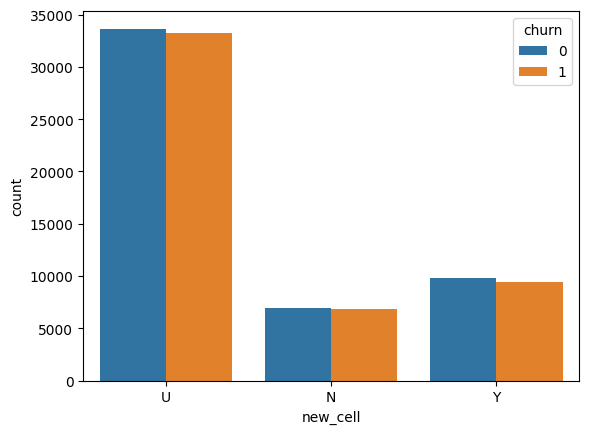

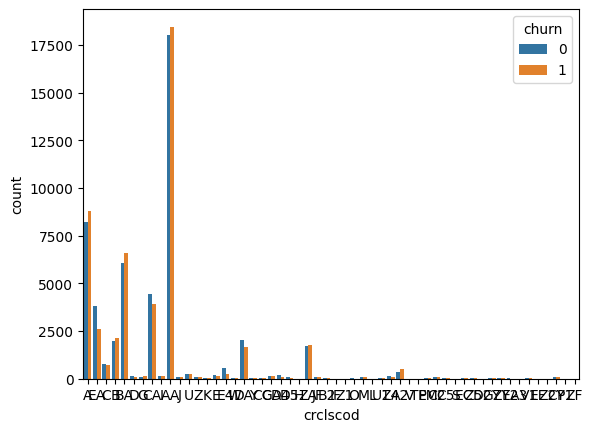

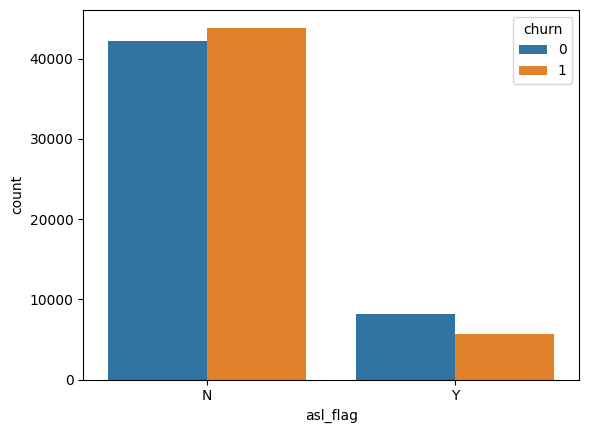

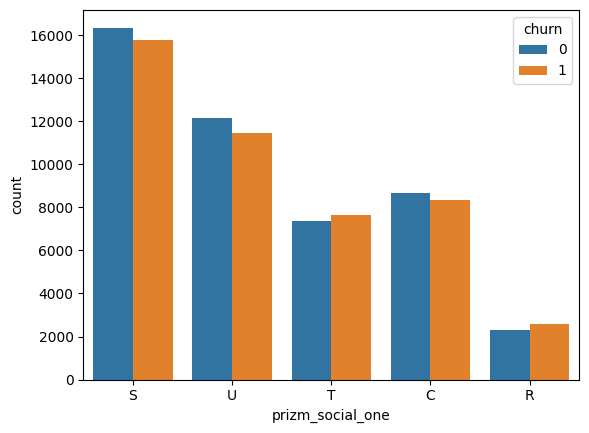

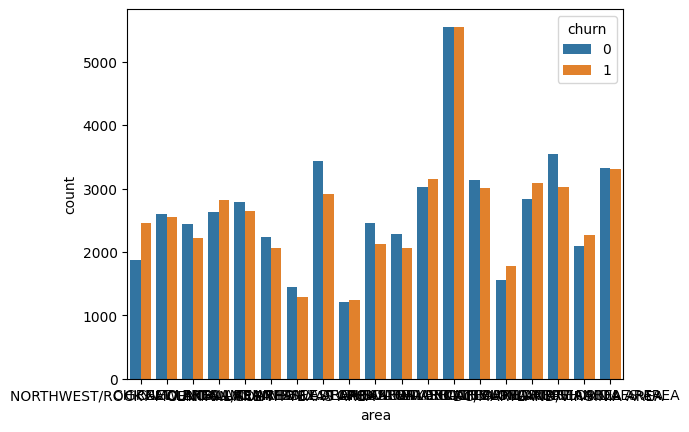

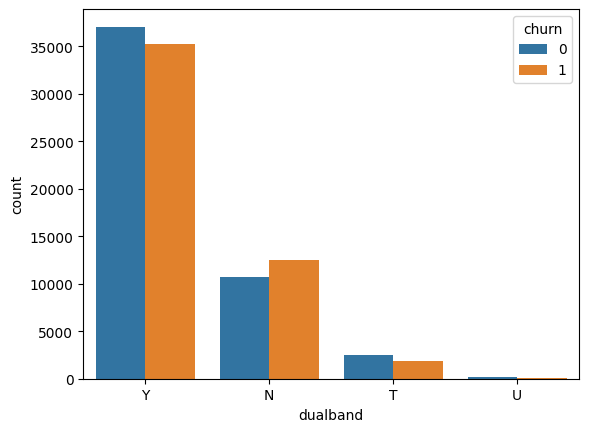

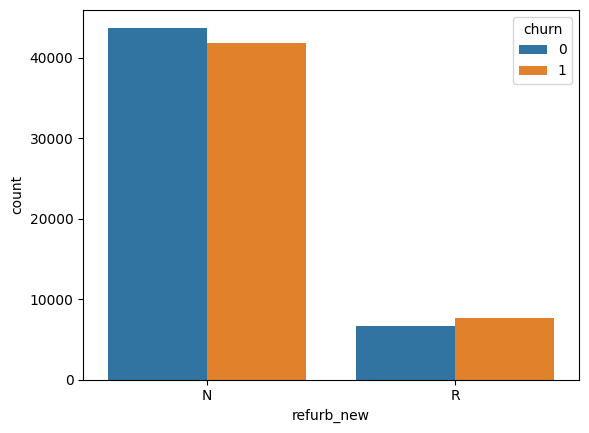

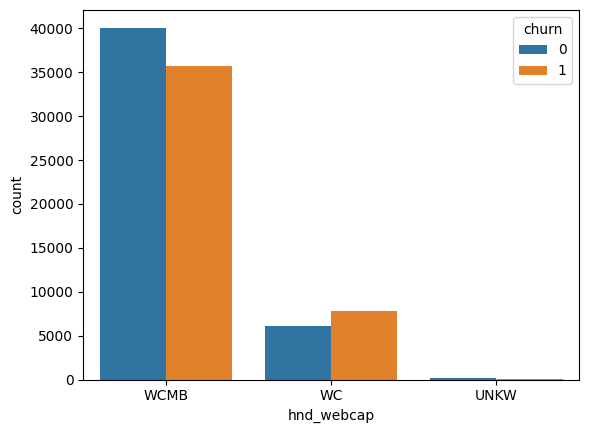

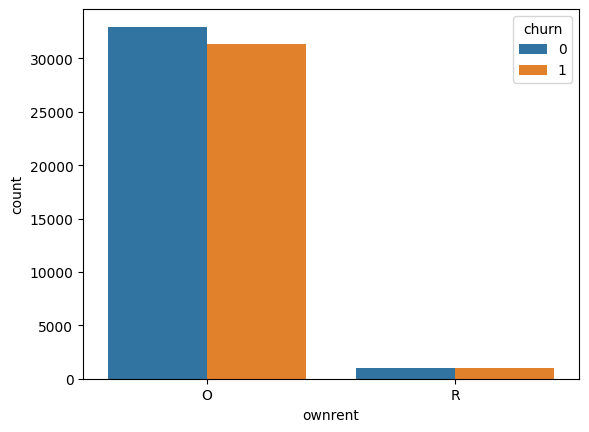

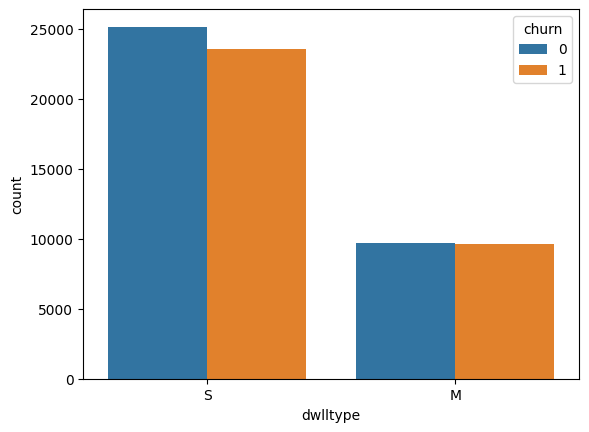

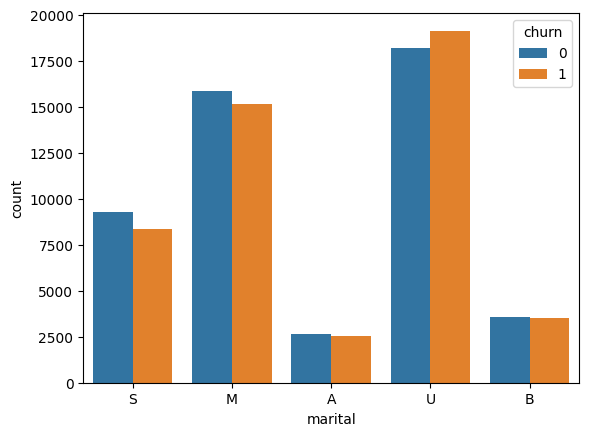

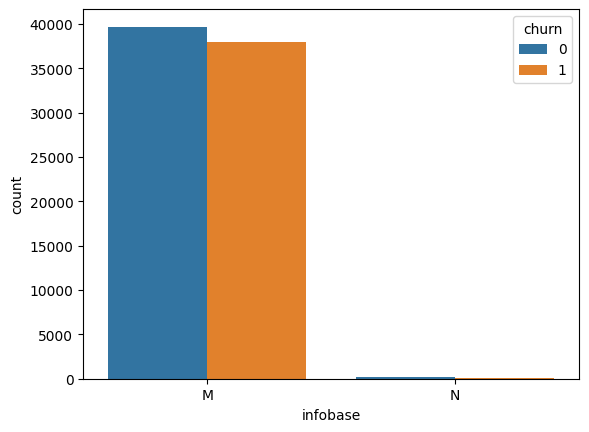

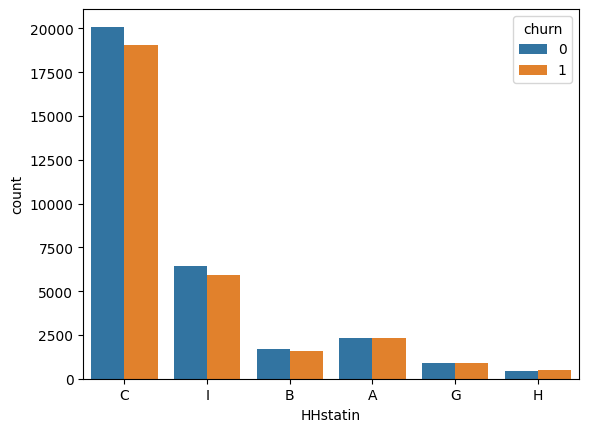

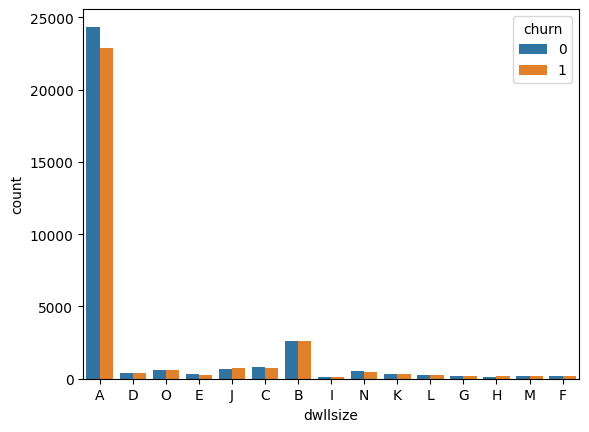

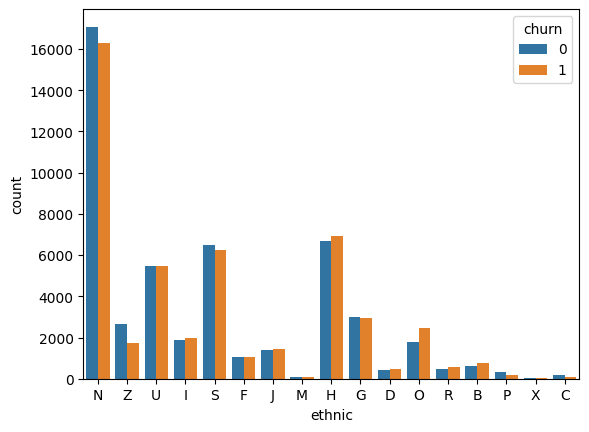

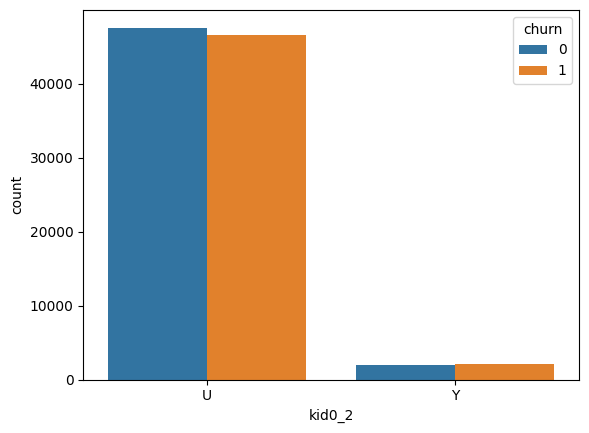

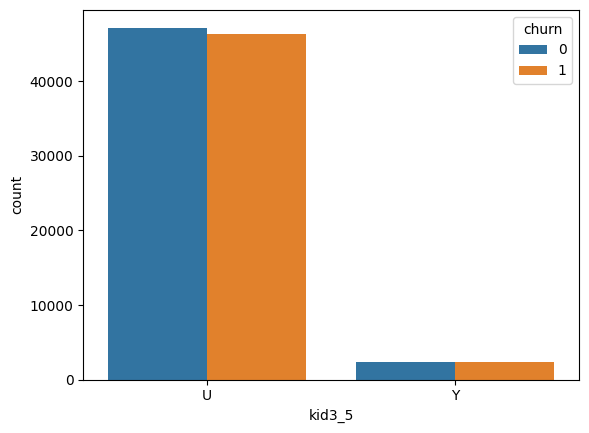

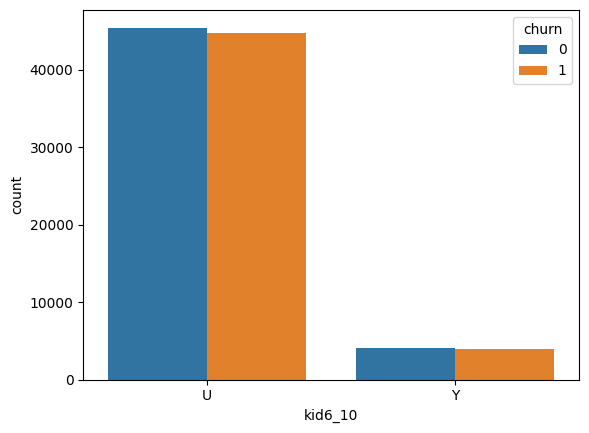

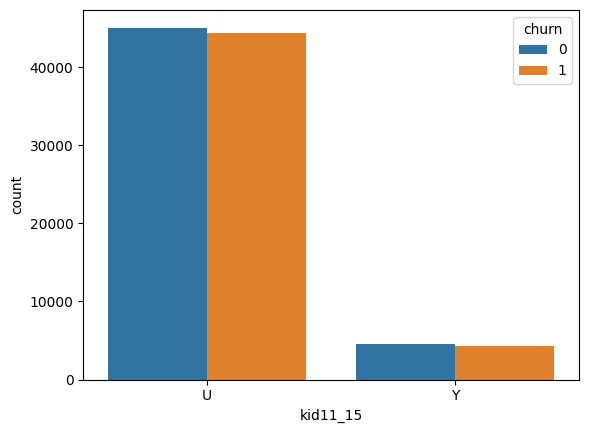

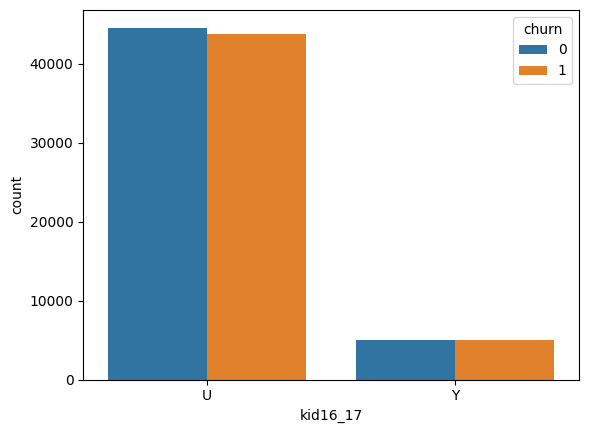

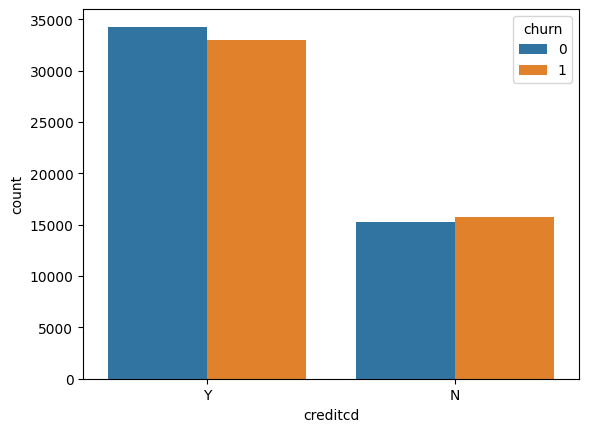

In [ ]:
for col in cat_cols:
    sns.countplot(x=col, hue="churn", data=df)
    plt.xticks()
    plt.show()

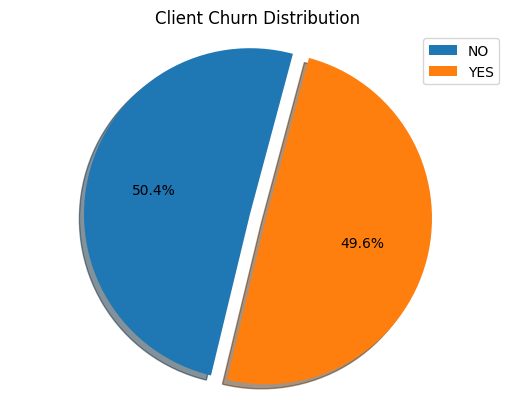

In [ ]:
# ratio of those who churn and those who didn't
sizes = [48401, 47647]
labels = 'NO', 'YES'
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=75)
ax.axis('equal')
ax.set_title("Client Churn Distribution")
ax.legend(labels)
plt.show()

Finding missing values and filling appropriately

In [ ]:
df.columns[df.isnull().any()]

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one',
       'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models',
       'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital',
       'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize',
       'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

In [ ]:
# Let's drop the columns that seem to have no significant contribution to the model.
df.drop(['numbcars', 'dwllsize', 'HHstatin', 'ownrent',
         'dwlltype','lor','income','adults','prizm_social_one',
         'infobase','crclscod'], axis=1, inplace=True)

In [ ]:
df['hnd_webcap']=df['hnd_webcap'].fillna('UNKW') # Handset web capability

df['avg6qty']=df['avg6qty'].fillna(df['avg6qty'].mean()) # Billing adjusted total number of calls over the life of the customer
df['avg6rev']=df['avg6rev'].fillna(df['avg6rev'].mean()) # Average monthly revenue over the life of the customer
df['avg6mou']=df['avg6mou'].fillna(df['avg6mou'].mean()) # Average monthly minutes of use over the life of the customer

df['change_mou']=df['change_mou'].fillna(df['change_mou'].mean()) # Percentage change in monthly minutes of use vs previous three month average
df['change_rev']=df['change_rev'].fillna(df['change_rev'].mean()) # Percentage change in monthly revenue vs previous three month average

df['rev_Mean']=df['rev_Mean'].fillna(df['rev_Mean'].mean())
df['totmrc_Mean']=df['totmrc_Mean'].fillna(df['totmrc_Mean'].mean())
df['da_Mean']=df['da_Mean'].fillna(df['da_Mean'].mean())
df['ovrmou_Mean']=df['ovrmou_Mean'].fillna(df['ovrmou_Mean'].mean())
df['ovrrev_Mean']=df['ovrrev_Mean'].fillna(df['ovrrev_Mean'].mean())
df['vceovr_Mean']=df['vceovr_Mean'].fillna(df['vceovr_Mean'].mean())
df['datovr_Mean']=df['datovr_Mean'].fillna(df['datovr_Mean'].mean())
df['roam_Mean']=df['roam_Mean'].fillna(df['roam_Mean'].mean())
df['mou_Mean']=df['mou_Mean'].fillna(df['mou_Mean'].mean())

df.dropna(inplace=True)

## Non-Distributed Implementation

In [ ]:
y = df['churn']  # Keep this as the target
X = df.drop(labels=['Customer_ID', 'churn'], axis=1)  # Features without 'churn' and also Customer_ID is a unique identifier and not significant for model

# Identify categorical features (EXCLUDING 'churn')
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(exclude='object').columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

# Transform features (X)
X_processed = preprocessor.fit_transform(X)

# Encode target (y)
y_encoded = LabelEncoder().fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.3, random_state=42)

In [ ]:
# Train model
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
non_distributed_time = time.time() - start_time

In [ ]:
# Evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Non-Distributed Accuracy: {accuracy:.4f}, Time: {non_distributed_time:.2f}s")

Non-Distributed Accuracy: 0.6214, Time: 33.05s


## Distributed Implementation

In [ ]:
from pyspark.ml.classification import RandomForestClassifier as SparkRFC
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, Imputer
from pyspark.ml import Pipeline
from pyspark.sql.types import *

# Initialize Spark session
spark = SparkSession.builder \
    .appName("ChurnPrediction") \
    .master("local[*]") \
    .getOrCreate()

# Load data
df_spark = spark.read.csv('/kaggle/input/telecom-customer/Telecom_customer churn.csv', header=True, inferSchema=True)

# Drop columns (same as pandas version)
columns_to_drop = ['numbcars', 'dwllsize', 'HHstatin', 'ownrent', 'dwlltype', 'lor',
                  'income', 'adults', 'prizm_social_one', 'infobase', 'crclscod',
                  'Customer_ID']
df_spark = df_spark.drop(*columns_to_drop)

# Handle missing values
# For categorical column
df_spark = df_spark.fillna({'hnd_webcap': 'UNKW'})

# For numerical columns - calculate mean and fill
numerical_columns = ['avg6qty', 'avg6rev', 'avg6mou', 'change_mou', 'change_rev',
                    'rev_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
                    'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'mou_Mean']

# Create imputers for numerical columns
imputers = [Imputer(inputCols=[col], outputCols=[col], strategy='mean')
           for col in numerical_columns]

# Create pipeline for imputation
imputation_pipeline = Pipeline(stages=imputers)
df_spark = imputation_pipeline.fit(df_spark).transform(df_spark)

# Drop any remaining null values
df_spark = df_spark.na.drop()

# Separate features and target
y = df_spark.select('churn')
X = df_spark.drop('churn')

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/02 02:47:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
full_data = df_spark  # the complete dataset

# Identify categorical/numerical columns
categorical_columns = [f.name for f in full_data.schema.fields
                      if isinstance(f.dataType, StringType) and f.name != 'churn']
numerical_columns = [f.name for f in full_data.schema.fields
                   if isinstance(f.dataType, (IntegerType, DoubleType, FloatType)) and f.name != 'churn']

# Modified preprocessing pipeline
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep")
          for col in categorical_columns]

encoder = OneHotEncoder(
    inputCols=[f"{col}_index" for col in categorical_columns],
    outputCols=[f"{col}_encoded" for col in categorical_columns]
)

assembler = VectorAssembler(
    inputCols=[f"{col}_encoded" for col in categorical_columns] + numerical_columns,
    outputCol="features"
)

# Add StringIndexer for the target column 'churn'
label_indexer = StringIndexer(inputCol="churn", outputCol="label")

In [ ]:
preprocessing_pipeline = Pipeline(stages=indexers + [encoder, assembler, label_indexer])

# Transform FULL dataset (including 'churn')
preprocessed_data = preprocessing_pipeline.fit(full_data).transform(full_data)

# Now select features and label
final_data = preprocessed_data.select("features", "label")

# Train-test split
train_data, test_data = final_data.randomSplit([0.7, 0.3], seed=42)

In [ ]:
# Train model
start_time = time.time()
spark_clf = SparkRFC(labelCol="label", numTrees=100, seed=42)
spark_model = spark_clf.fit(train_data)
distributed_time = time.time() - start_time

In [ ]:
# Evaluate
predictions = spark_model.transform(test_data)
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / test_data.count()
print(f"Distributed Accuracy: {accuracy:.4f}, Time: {distributed_time:.2f}s")

spark.stop()

Distributed Accuracy: 0.5881, Time: 37.19s


## Measure Speed-Up, Size-Up, and Scale-Up metrics


=== Speed-Up Test: 1 core(s) ===


Time with 1 core(s): 39.79s

=== Speed-Up Test: 2 core(s) ===


Time with 2 core(s): 29.11s

=== Speed-Up Test: 4 core(s) ===


Time with 4 core(s): 24.35s


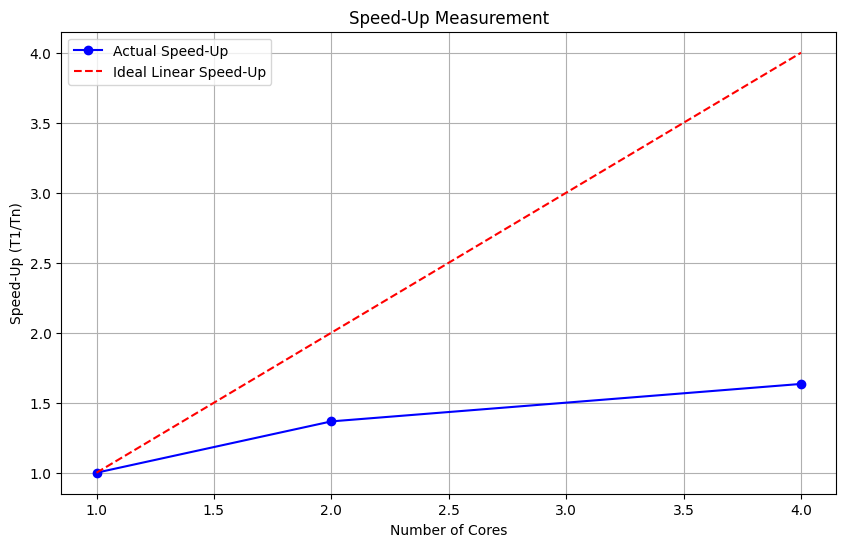


=== Size-Up Test: 1x Data ===


Time with 1x data: 23.77s

=== Size-Up Test: 2x Data ===


Time with 2x data: 45.35s

=== Size-Up Test: 4x Data ===


25/05/02 03:00:23 WARN DAGScheduler: Broadcasting large task binary with size 1117.6 KiB            


Time with 4x data: 83.06s


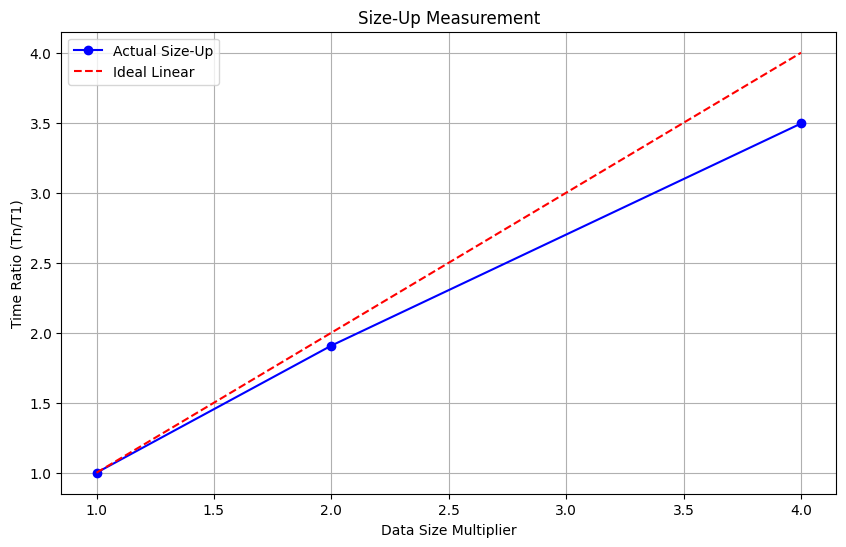


=== Scale-Up Test: 1x Data & Cores ===


Time with 1x data/cores: 41.20s

=== Scale-Up Test: 2x Data & Cores ===


Time with 2x data/cores: 51.94s


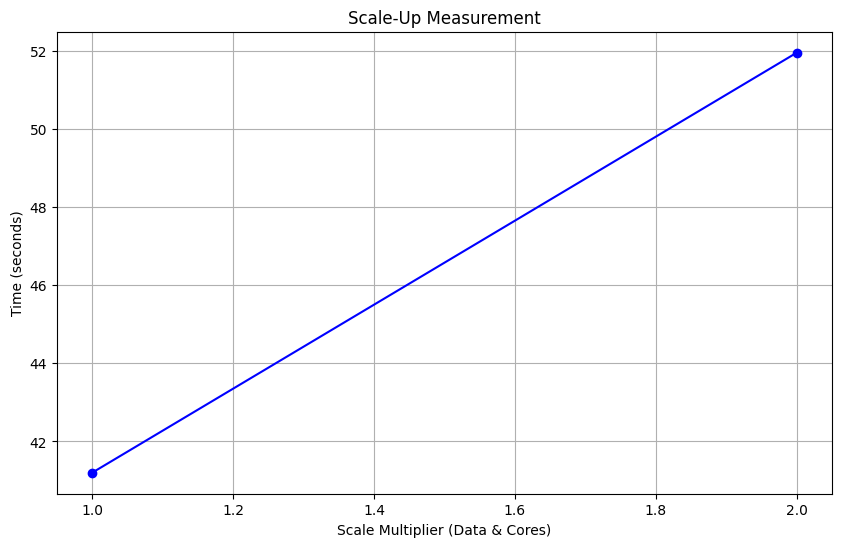

In [ ]:
########################################################################### Measure Speed-Up (Vary cores, fixed data size) #############################################################

speed_up_cores = [1, 2, 4]  # Test with 1, 2, and 4 cores
speed_up_times = []

for cores in speed_up_cores:
    print(f"\n=== Speed-Up Test: {cores} core(s) ===")

    # Initialize Spark with core configuration
    spark = SparkSession.builder \
        .appName(f"SpeedUp_{cores}cores") \
        .master(f"local[{cores}]") \
        .getOrCreate()

    # Load and preprocess data (same as original distributed code)
    df_spark = spark.read.csv('/kaggle/input/telecom-customer/Telecom_customer churn.csv',
                             header=True, inferSchema=True)

    # --- Preprocessing Steps (Same as Original) ---
    df_spark = df_spark.drop(*columns_to_drop)
    df_spark = df_spark.fillna({'hnd_webcap': 'UNKW'})
    imputation_pipeline = Pipeline(stages=imputers)
    df_spark = imputation_pipeline.fit(df_spark).transform(df_spark)
    df_spark = df_spark.na.drop()
    preprocessed_data = preprocessing_pipeline.fit(df_spark).transform(df_spark)
    final_data = preprocessed_data.select("features", "label")
    train_data, _ = final_data.randomSplit([0.7, 0.3], seed=42)
    # ----------------------------------------------

    # Time training
    start_time = time.time()
    spark_clf = SparkRFC(labelCol="label", numTrees=100, seed=42)
    spark_model = spark_clf.fit(train_data)
    speed_up_times.append(time.time() - start_time)

    spark.stop()
    print(f"Time with {cores} core(s): {speed_up_times[-1]:.2f}s")

# Calculate Speed-Up ratios
base_time = speed_up_times[0]
speed_up_ratios = [base_time / t for t in speed_up_times]

# Plot
plt.figure(figsize=(10,6))
plt.plot(speed_up_cores, speed_up_ratios, 'bo-', label='Actual Speed-Up')
plt.plot(speed_up_cores, speed_up_cores, 'r--', label='Ideal Linear Speed-Up')
plt.xlabel('Number of Cores'); plt.ylabel('Speed-Up (T1/Tn)')
plt.title('Speed-Up Measurement'); plt.legend(); plt.grid()
plt.show()








#############################################################################   Measure Size-Up (Fixed cores, varying data size)  ###############################################



size_up_multipliers = [1, 2, 4]  # Data size multipliers
size_up_times = []
FIXED_CORES = 4  # Keep cores constant

for multiplier in size_up_multipliers:
    print(f"\n=== Size-Up Test: {multiplier}x Data ===")

    spark = SparkSession.builder \
        .appName(f"SizeUp_{multiplier}x") \
        .master(f"local[{FIXED_CORES}]") \
        .getOrCreate()

    # Load and replicate data
    df_spark_orig = spark.read.csv('/kaggle/input/telecom-customer/Telecom_customer churn.csv',
                                  header=True, inferSchema=True)
    replicated_df = df_spark_orig
    for _ in range(multiplier - 1):
        replicated_df = replicated_df.union(df_spark_orig)

    # --- Preprocessing Steps ---
    replicated_df = replicated_df.drop(*columns_to_drop)
    replicated_df = replicated_df.fillna({'hnd_webcap': 'UNKW'})
    imputation_pipeline = Pipeline(stages=imputers)
    replicated_df = imputation_pipeline.fit(replicated_df).transform(replicated_df)
    replicated_df = replicated_df.na.drop()
    preprocessed_data = preprocessing_pipeline.fit(replicated_df).transform(replicated_df)
    final_data = preprocessed_data.select("features", "label")
    train_data, _ = final_data.randomSplit([0.7, 0.3], seed=42)
    # ---------------------------

    # Time training
    start_time = time.time()
    spark_clf = SparkRFC(labelCol="label", numTrees=100, seed=42)
    spark_model = spark_clf.fit(train_data)
    size_up_times.append(time.time() - start_time)

    spark.stop()
    print(f"Time with {multiplier}x data: {size_up_times[-1]:.2f}s")

# Calculate Size-Up ratios
base_size_time = size_up_times[0]
size_up_ratios = [t / base_size_time for t in size_up_times]

# Plot
plt.figure(figsize=(10,6))
plt.plot(size_up_multipliers, size_up_ratios, 'bo-', label='Actual Size-Up')
plt.plot(size_up_multipliers, size_up_multipliers, 'r--', label='Ideal Linear')
plt.xlabel('Data Size Multiplier'); plt.ylabel('Time Ratio (Tn/T1)')
plt.title('Size-Up Measurement'); plt.legend(); plt.grid()
plt.show()










############################################################     Measure Scale-Up (Increase data & cores proportionally) ##################################################

scale_up_multipliers = [1, 2]  # Multipliers for data and cores
scale_up_times = []

for scale in scale_up_multipliers:
    print(f"\n=== Scale-Up Test: {scale}x Data & Cores ===")

    spark = SparkSession.builder.appName(f"ScaleUp_{scale}x").master(f"local[{scale}]").getOrCreate()

    # Load and replicate data
    df_spark_orig = spark.read.csv('/kaggle/input/telecom-customer/Telecom_customer churn.csv',
                                  header=True, inferSchema=True)
    replicated_df = df_spark_orig
    for _ in range(scale - 1):
        replicated_df = replicated_df.union(df_spark_orig)

    # --- Preprocessing Steps ---
    replicated_df = replicated_df.drop(*columns_to_drop)
    replicated_df = replicated_df.fillna({'hnd_webcap': 'UNKW'})
    imputation_pipeline = Pipeline(stages=imputers)
    replicated_df = imputation_pipeline.fit(replicated_df).transform(replicated_df)
    replicated_df = replicated_df.na.drop()
    preprocessed_data = preprocessing_pipeline.fit(replicated_df).transform(replicated_df)
    final_data = preprocessed_data.select("features", "label")
    train_data, _ = final_data.randomSplit([0.7, 0.3], seed=42)
    # ---------------------------

    # Time training
    start_time = time.time()
    spark_clf = SparkRFC(labelCol="label", numTrees=100, seed=42)
    spark_model = spark_clf.fit(train_data)
    scale_up_times.append(time.time() - start_time)

    spark.stop()
    print(f"Time with {scale}x data/cores: {scale_up_times[-1]:.2f}s")

# Plot
plt.figure(figsize=(10,6))
plt.plot(scale_up_multipliers, scale_up_times, 'bo-', label='Actual Time')
plt.xlabel('Scale Multiplier (Data & Cores)'); plt.ylabel('Time (seconds)')
plt.title('Scale-Up Measurement'); plt.grid()
plt.show()

#